# 😋🍞 In which our heroine emerges from her winter trip both victorious, and full

**Loading the Dataset** 

In [ ]:
!pip install geopandas
!pip install squarify
!pip install --upgrade matplotlib

In [2]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import seaborn as sns
import geopandas as gpd
from geopandas.tools import geocode
import squarify    # pip install squarify (algorithm for treemap)
import mpl_toolkits
import folium

**Reading the dataset**

In [3]:
df = pd.read_excel("/content/Best Restaurants in Germany.xlsx")
df.head()

,Rank,Restaurant,Quality Score,Postal Code,City,Open for Lunch,Open for Dinner,Open for Midday,Plant Holidays,Price Per Person,Courses,Chef,Culinary Category,Stars
0,1.0,Aqua,118.7,38440\n \n /\n ...,Wolfsburg,Yes,Yes,Yes,Yes,255€,14 courses,Sven Elverfeld,Innovative Cuisine,5.0
1,2.0,GästeHaus Klaus Erfort,118.2,66121\n \n /\n ...,Saarbrücken,Yes,Yes,Yes,Yes,205€,9 courses,Klaus Erfort,modern classic Cuisine,5.0
2,3.0,Überfahrt,117.9,83700\n \n /\n ...,Rottach-Egern,Yes,Yes,Yes,Yes,309€,7 courses,Christian Jürgens,Innovative Cuisine,5.0
3,3.0,Victor's Fine Dining by Christian Bau,117.9,66706\n \n /\n ...,Perl,Yes,Yes,Yes,Yes,265€,9 courses,Christian Bau,Innovative Cuisine,5.0
4,5.0,Sonnora,117.7,54518\n \n /\n ...,Dreis,Yes,Yes,Yes,Yes,230€,9 courses,Clemens Rambichler,Classic gourmet cuisine Cuisine,5.0


**Look at data information**

In [4]:
df.columns

Index(['Rank', 'Restaurant', 'Quality Score', 'Postal Code', 'City',
       'Open for Lunch', 'Open for Dinner', 'Open for Midday',
       'Plant Holidays', 'Price Per Person', 'Courses', 'Chef',
       'Culinary Category', 'Stars'],
      dtype='object')

In [5]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


Rank                  0.61
Restaurant            0.61
Quality Score         0.61
Postal Code           0.61
City                  0.61
Open for Lunch        0.61
Open for Dinner       0.61
Open for Midday       0.61
Plant Holidays        0.61
Price Per Person     20.98
Courses              20.98
Chef                  6.81
Culinary Category     3.15
Stars                 0.61
dtype: float64

#### **List of *Chefs* by their Rank🏆** **and**
#### ***Restaurants* by their Star Rating⭐**

In [6]:
print("Rank   |   Chef   |   Restaurant | Stars")
for i in range(len(df)):
    print(df['Rank'].iloc[i].astype(int),"-", df['Chef'].iloc[i],"  -  ",df['Restaurant'].iloc[i],"-",df['Stars'].iloc[i])

Rank   |   Chef   |   Restaurant | Stars
1 - Sven Elverfeld   -   Aqua - 5.0
2 - Klaus Erfort   -   GästeHaus Klaus Erfort - 5.0
3 - Christian Jürgens   -   Überfahrt - 5.0
3 - Christian Bau   -   Victor's Fine Dining by Christian Bau - 5.0
5 - Clemens Rambichler   -   Sonnora - 5.0
5 - Joachim Wissler   -   Vendôme - 5.0
7 - Jan Hartwig   -   Atelier - 5.0
8 - Torsten Michel   -   Schwarzwaldstube - 5.0
8 - Claus-Peter Lumpp   -   Bareiss - 5.0
10 - Kevin Fehling   -   The Table - 5.0
11 - Christian Binder   -   Steinheuers Restaurant - 5.0
13 - Jan-Philipp Berner   -   Söl'ring Hof - 5.0
14 - Christoph Rüffer   -   Haerlin - 5.0
14 - nan   -   Schwarzenstein Nils Henkel - 5.0
16 - Tim Raue   -   Tim Raue - 5.0
17 - Christian Scharrer   -   Courtier - 5.0
18 - Peter Maria Schnurr   -   Falco - 5.0
19 - Dominik Paul   -   OPUS V - 4.0
20 - nan   -   Werneckhof by Geisel - 5.0
21 - Sebastian Frank   -   Horváth - 4.0
21 - Marco Müller   -   Rutz - 5.0
24 - Thomas Schanz   -   schanz - 4

### **Number of Restaurants by City🌆**

In [7]:
df.City.value_counts().head(20)

Berlin              213
Munich              172
Hamburg             150
Köln                 93
Stuttgart            80
Frankfurt (Main)     77
Düsseldorf           60
Nürnberg             57
Baiersbronn          48
Mannheim             34
Heidelberg           33
Hannover             28
Essen                27
Fellbach             26
Dortmund             25
Rottach-Egern        24
Dresden              23
Saarbrücken          22
Eltville             22
Wolfsburg            22
Name: City, dtype: int64

In [8]:
city=df['City'].value_counts()
names=city.index
values=city.values

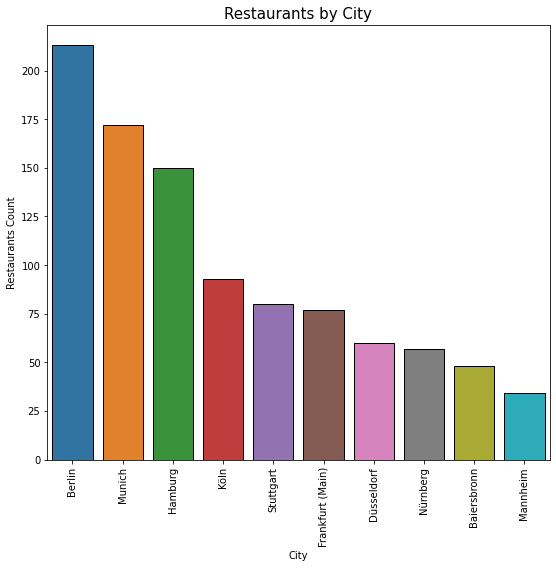

In [9]:
plt.figure(figsize=(9,8))
plt.style.use('default')
sns.barplot(x=names[:10],y=values[:10],edgecolor='k')
plt.xticks(rotation=90)
plt.ylabel('Restaurants Count')
plt.xlabel('City')
plt.title('Restaurants by City',fontsize=15)
plt.show()

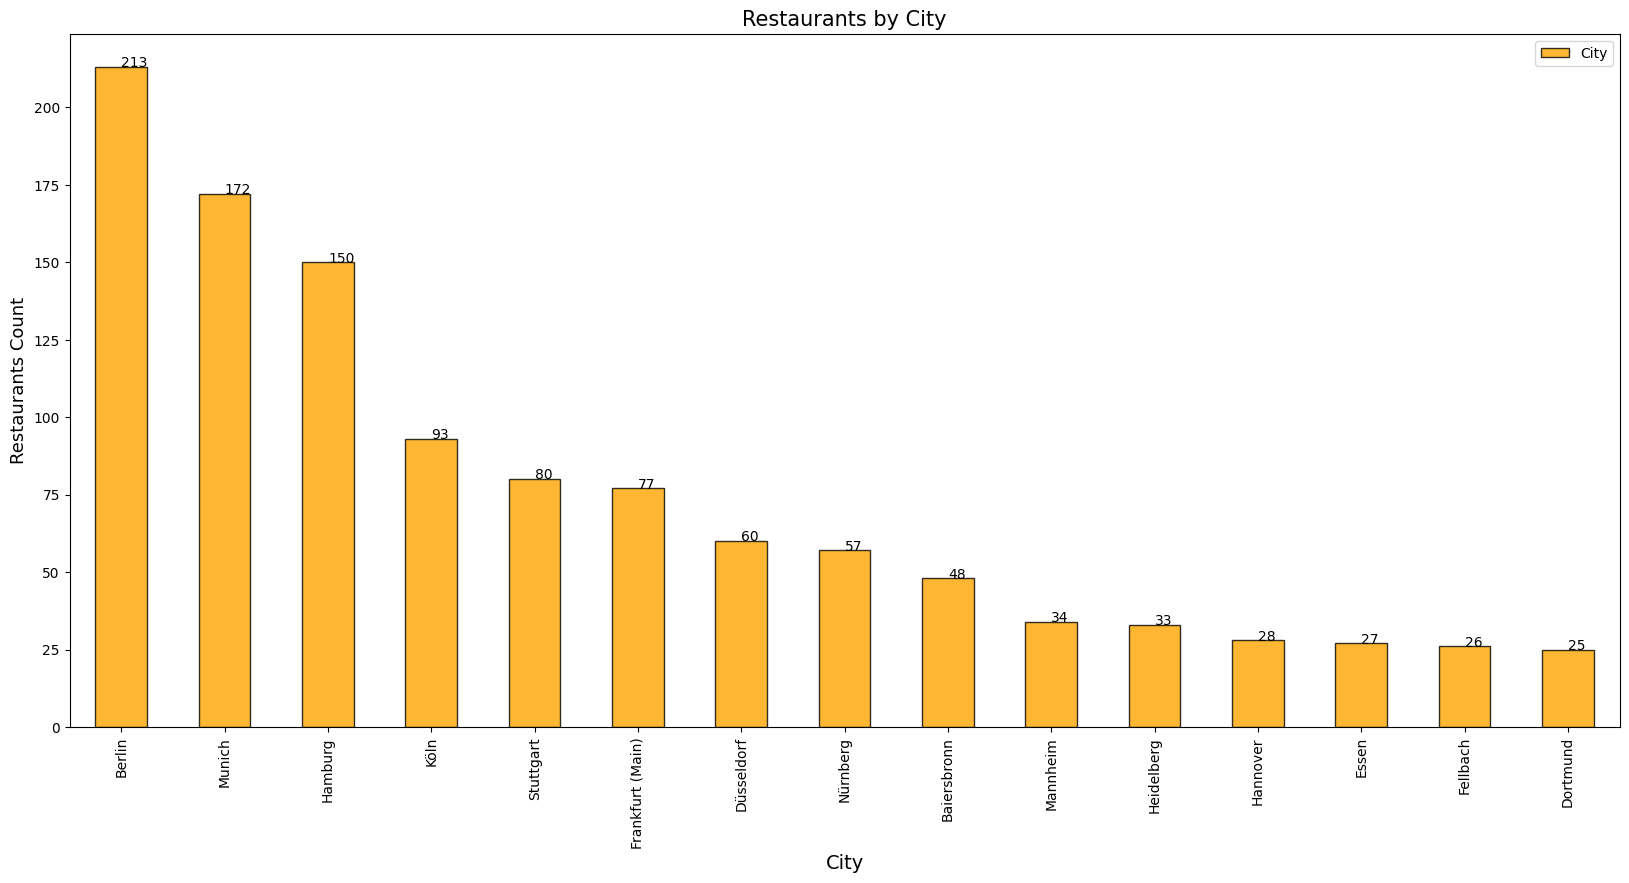

In [10]:
plt.figure(figsize=(20,9))

plt.style.use('tableau-colorblind10')
df['City'].value_counts()[:15].plot(kind='bar',edgecolor='k',color='orange', alpha=0.8)
  
for index, value in enumerate(df['City'].value_counts()[:15]):
    plt.text(index, value, str(value))
plt.xlabel("City", fontsize=14)
plt.ylabel("Restaurants Count", fontsize=13)
plt.title("Restaurants by City", fontsize=15)
plt.legend()
plt.show()

### **Restaurants by Stars(Rating)**

In [11]:
df.Stars.value_counts()

3.0    1725
2.0     946
4.0     397
1.0     198
5.0     178
Name: Stars, dtype: int64

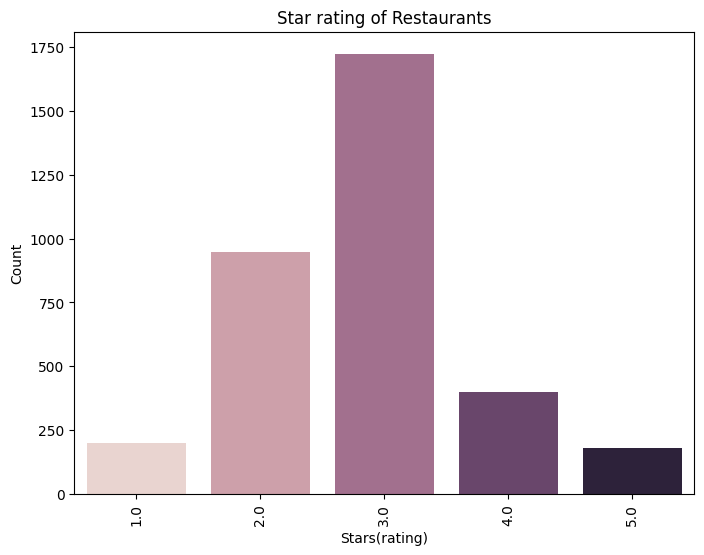

In [12]:
stars_index=df.Stars.value_counts()
stars_index=stars_index.head(10)

plt.figure(figsize=(8,6))
ax=sns.barplot(x=stars_index.index,y=stars_index.values,palette=sns.cubehelix_palette(len(stars_index.index)))
plt.xlabel('Stars(rating)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Star rating of Restaurants')
plt.show()

### **List of *Cuisine Types* served across *Germany***

In [13]:
df['Culinary Category'].value_counts()[:20]

Innovative Cuisine                   484
Regionale Cuisine                    473
Moderne Klassik Cuisine              299
Französische Cuisine                 283
Slow Food Cuisine                    195
Saisonale Produkte Cuisine           177
Classic gourmet cuisine Cuisine      172
Mediterrane Cuisine                  141
Internationale Cuisine               135
Saisonale regionale Cuisine          124
French Cuisine                       112
Klassische Cuisine                   101
modern classic Cuisine                99
Crossover Cuisine                     79
Italienische Cuisine                  75
Weinlokal Cuisine                     51
Bio-Produkte Cuisine                  37
Regional cuisine Cuisine              32
Kreative Deutsche Cuisine             31
seasonal regional cuisine Cuisine     30
Name: Culinary Category, dtype: int64

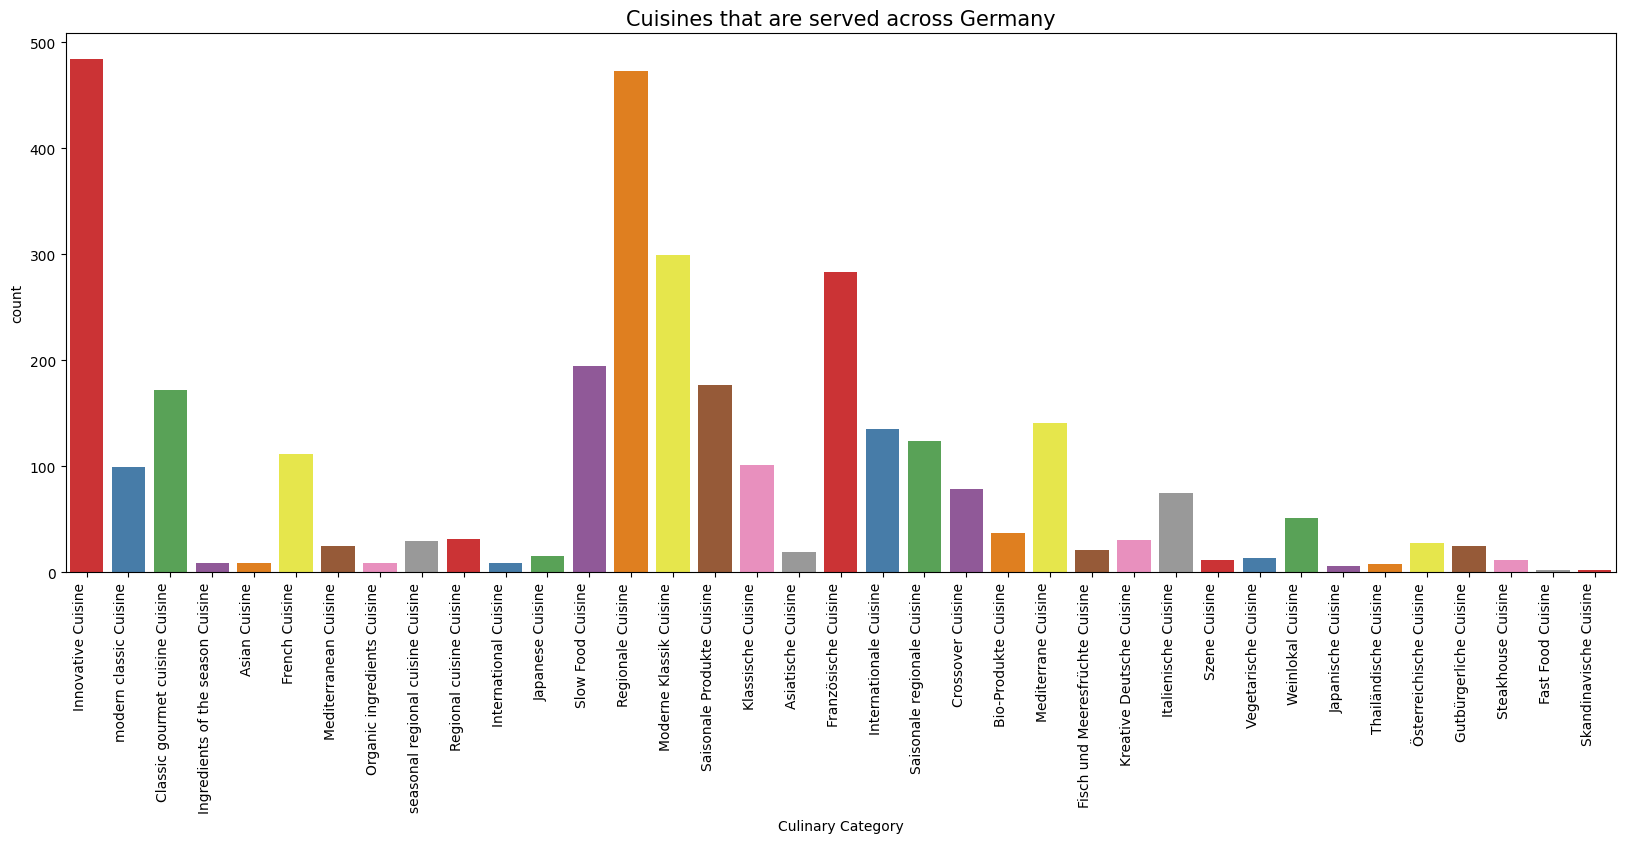

In [14]:
rcParams['figure.figsize'] = 20,7
g = sns.countplot(x="Culinary Category",data=df, palette = "Set1")   
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Cuisines that are served across Germany',size = 15)
plt.show()

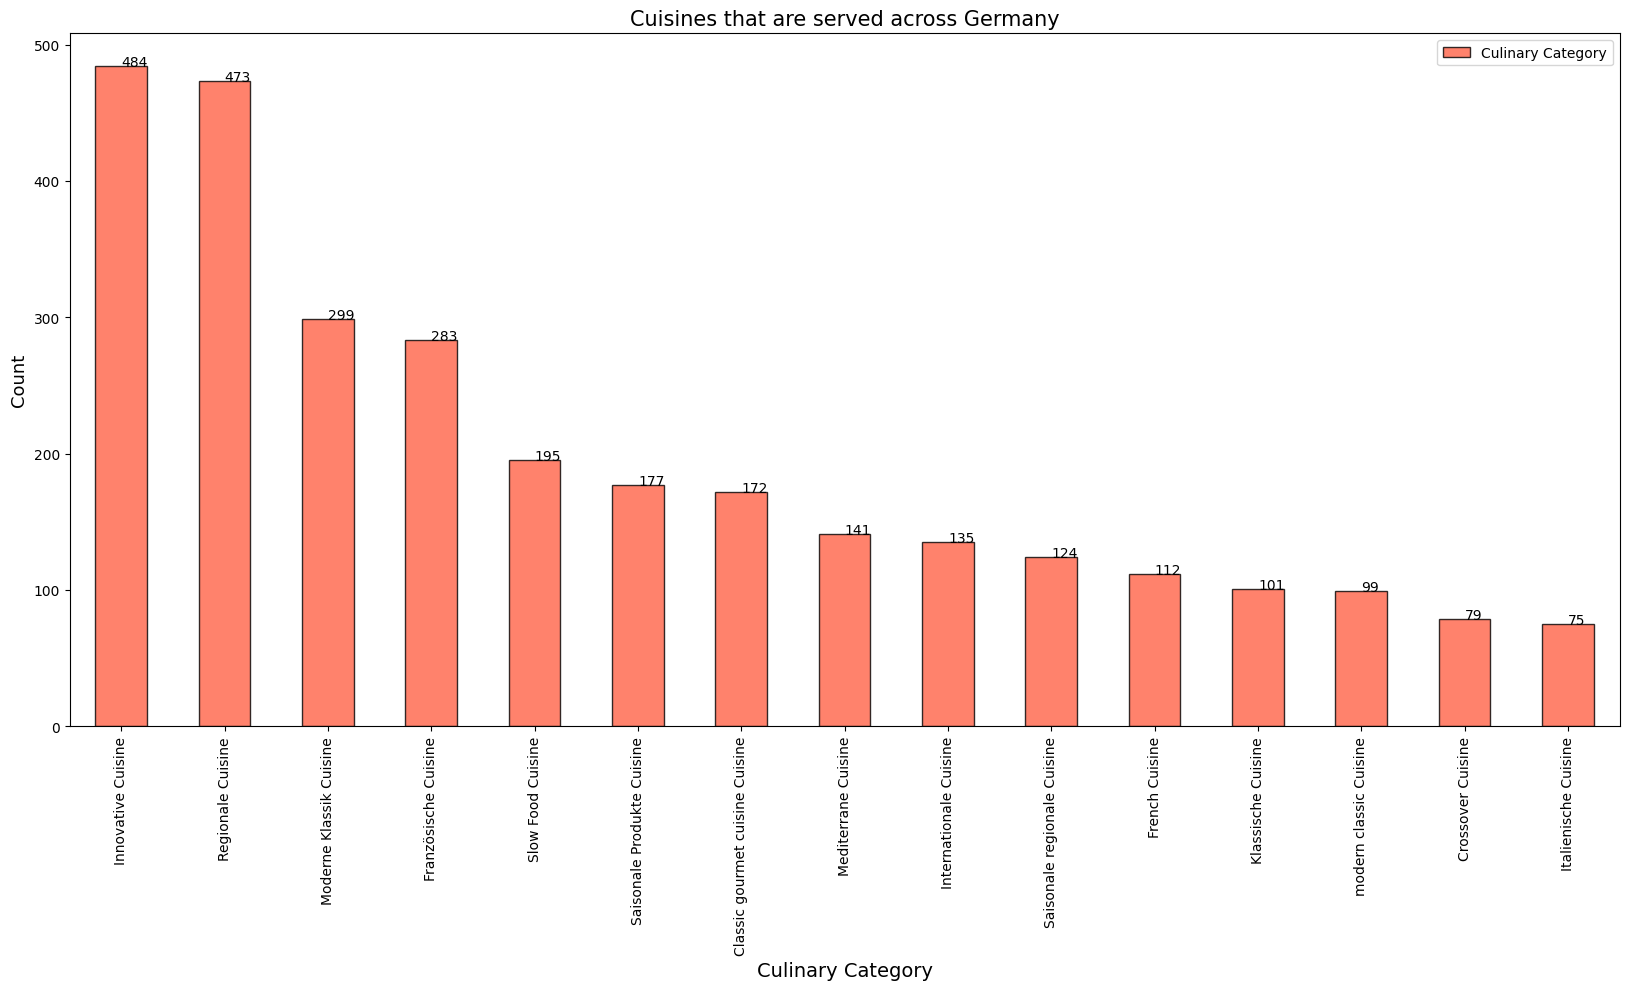

In [15]:
plt.figure(figsize=(20,9))

plt.style.use('default')
df['Culinary Category'].value_counts()[:15].plot(kind='bar',edgecolor='k',color='tomato', alpha=0.8)
  
for index, value in enumerate(df['Culinary Category'].value_counts()[:15]):
    plt.text(index, value, str(value))
plt.xlabel("Culinary Category", fontsize=14)
plt.ylabel("Count", fontsize=13)
plt.title("Cuisines that are served across Germany", fontsize=15)
plt.legend()
plt.show()

**Restaurants that are open for Lunch, Midday and Dinner**

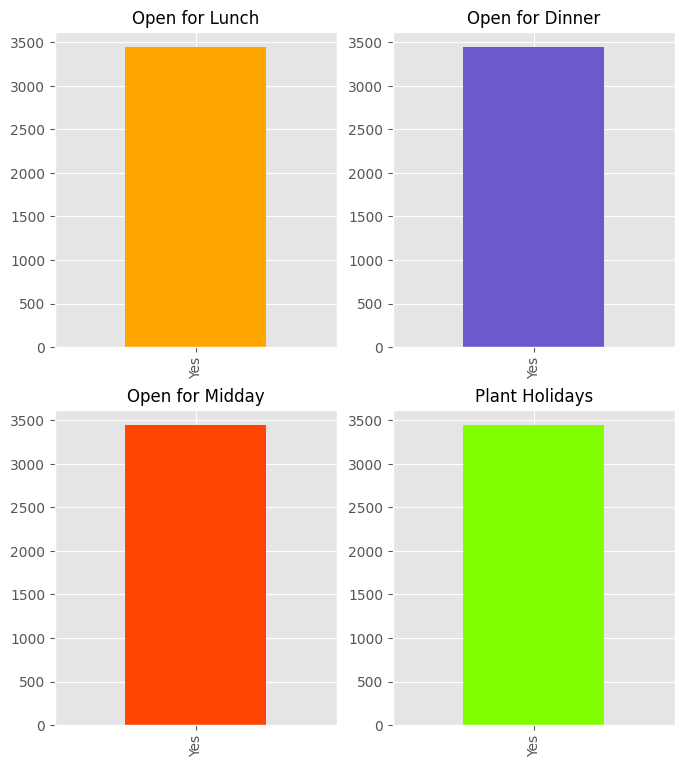

In [16]:
plt.rcParams['figure.figsize'] = (8, 9)
plt.style.use('ggplot')

plt.subplot(2,2,1)
df['Open for Lunch'].value_counts().plot.bar(color = 'orange', width=0.5)
plt.title('Open for Lunch', fontsize = 12)

plt.subplot(2,2,2)
df['Open for Dinner'].value_counts().plot.bar(color = 'slateblue', width=0.5)
plt.title('Open for Dinner', fontsize = 12)

plt.subplot(2,2,3)
df['Open for Midday'].value_counts().plot.bar(color = 'orangered', width=0.5)
plt.title('Open for Midday', fontsize = 12)

plt.subplot(2,2,4)
df['Plant Holidays'].value_counts().plot.bar(color = 'chartreuse', width=0.5)
plt.title('Plant Holidays', fontsize = 12)

plt.show()

### **Restaurants by their Quality Score**

In [17]:
df['Quality Score'].value_counts().head(20)

97.8     49
94.5     42
94.3     36
77.5     36
97.3     35
96.1     35
96.8     35
100.0    34
94.8     30
96.5     28
99.0     28
96.2     28
95.8     28
96.3     28
82.5     25
111.7    25
99.6     25
95.0     25
78.2     24
94.0     24
Name: Quality Score, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


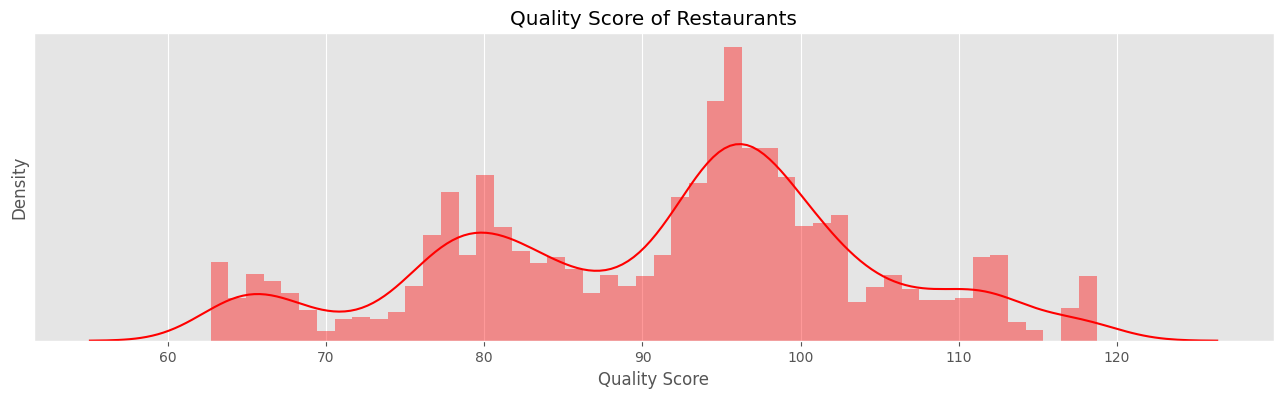

In [18]:
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['Quality Score'],bins=50, kde=True,color='red')
ax.set_title('Quality Score of Restaurants')
ax. set_yticks([])
plt.show()

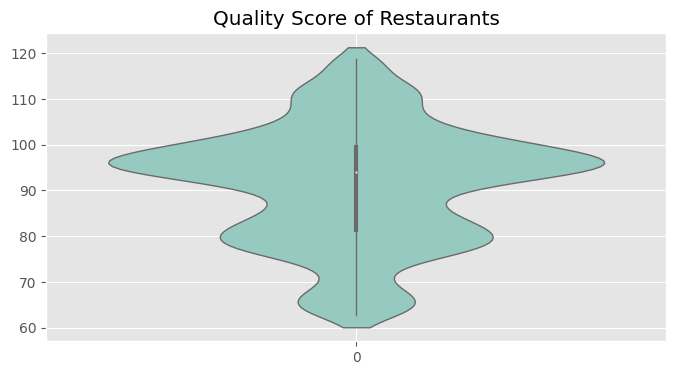

In [19]:
fig, ax = plt.subplots(figsize=[8,4])
sns.violinplot(data=df['Quality Score'], palette="Set3", bw=.2, cut=1, linewidth=1)
ax.set_title('Quality Score of Restaurants')
ax.grid('off')
plt.show()

### **Price Per Person** in €

In [20]:
df['Price Per Person']= df['Price Per Person'].str.split("€", n = 1, expand = True) 
df['Price Per Person']

0       255
1       205
2       309
3       265
4       230
       ... 
3460    110
3461    NaN
3462     39
3463    NaN
3464     54
Name: Price Per Person, Length: 3465, dtype: object

In [21]:
df.dropna(how='any',inplace=True)
df.head()

,Rank,Restaurant,Quality Score,Postal Code,City,Open for Lunch,Open for Dinner,Open for Midday,Plant Holidays,Price Per Person,Courses,Chef,Culinary Category,Stars
0,1.0,Aqua,118.7,38440\n \n /\n ...,Wolfsburg,Yes,Yes,Yes,Yes,255,14 courses,Sven Elverfeld,Innovative Cuisine,5.0
1,2.0,GästeHaus Klaus Erfort,118.2,66121\n \n /\n ...,Saarbrücken,Yes,Yes,Yes,Yes,205,9 courses,Klaus Erfort,modern classic Cuisine,5.0
2,3.0,Überfahrt,117.9,83700\n \n /\n ...,Rottach-Egern,Yes,Yes,Yes,Yes,309,7 courses,Christian Jürgens,Innovative Cuisine,5.0
3,3.0,Victor's Fine Dining by Christian Bau,117.9,66706\n \n /\n ...,Perl,Yes,Yes,Yes,Yes,265,9 courses,Christian Bau,Innovative Cuisine,5.0
4,5.0,Sonnora,117.7,54518\n \n /\n ...,Dreis,Yes,Yes,Yes,Yes,230,9 courses,Clemens Rambichler,Classic gourmet cuisine Cuisine,5.0


In [22]:
df['Price Per Person'].value_counts()

145    96
135    85
89     84
115    83
125    83
       ..
83      2
104     2
60      2
82      2
37      2
Name: Price Per Person, Length: 128, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


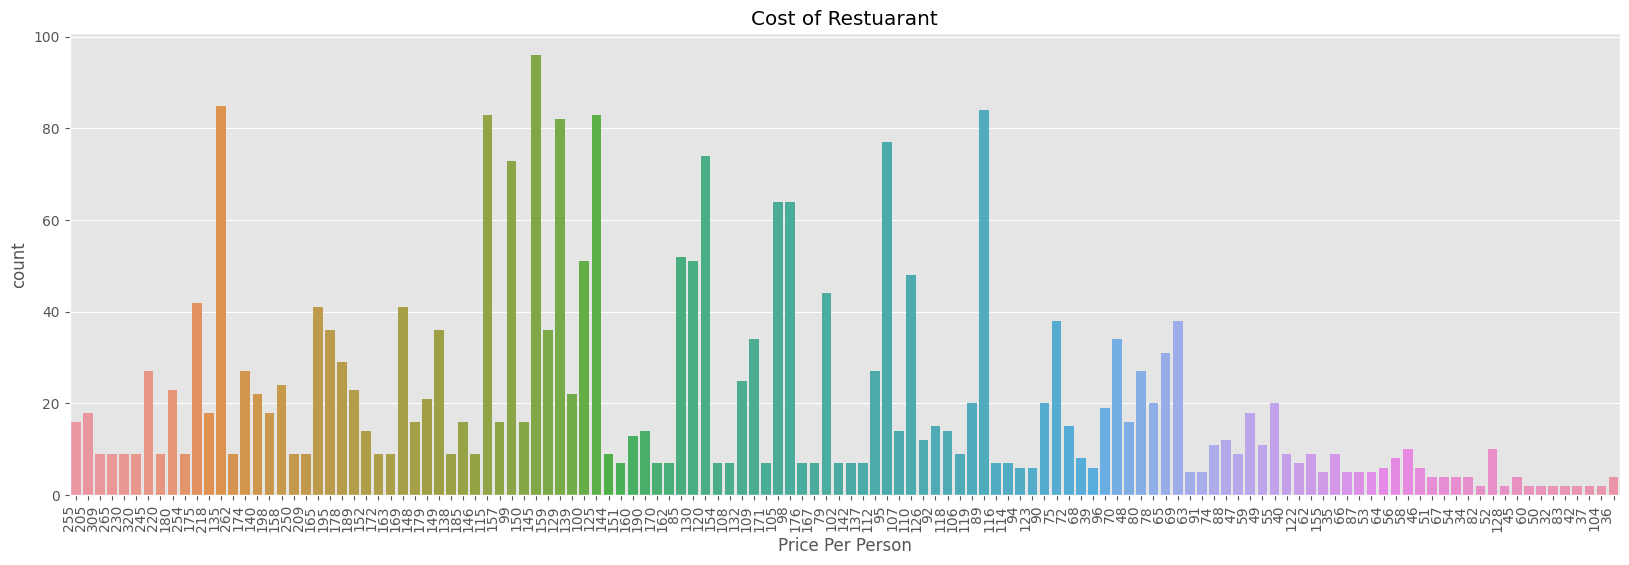

In [23]:
sns.countplot(df['Price Per Person']).set_xticklabels(sns.countplot(df['Price Per Person']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,6)
plt.title('Cost of Restuarant')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


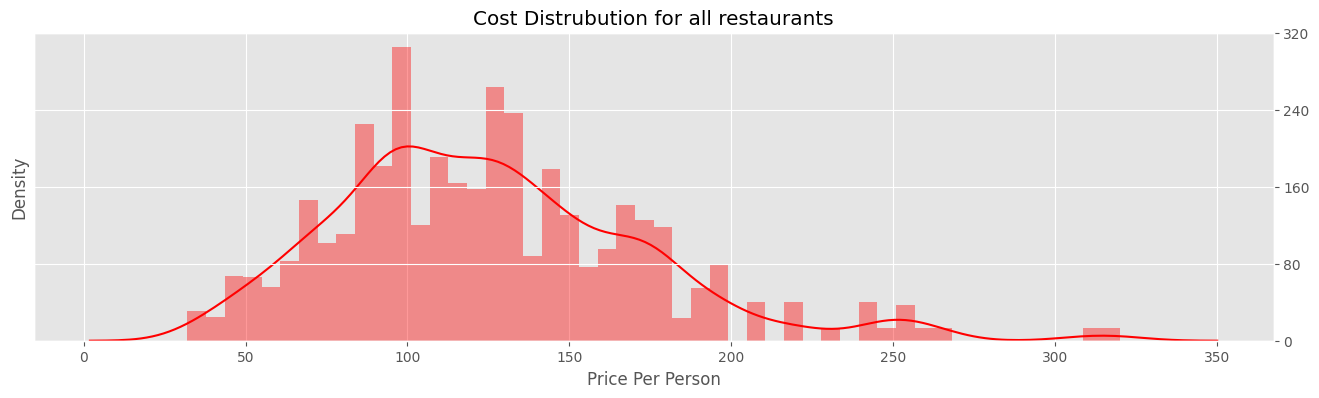

In [24]:
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['Price Per Person'],bins=50, kde=True,color='red', ax=ax)
ax.set_title('Cost Distrubution for all restaurants')


ax. set_yticks([])
ax2 = ax.twinx() # create a second y axis
y_max = df['Price Per Person'].astype(float).max() # maximum of the array

# find the percentages of the max y values.
# This will be where the "0%, 25%" labels will be placed
ticks = [0, 0.25*y_max, 0.5*y_max, 0.75*y_max, y_max] 

ax2.set_ylim(ax.get_ylim()) # set second y axis to have the same limits as the first y axis
ax2.set_yticks(ticks) 
# ax2.set_yticklabels(["0%", "25%","50%","75%","100%"]) # labels in percentage
ax2.grid("off")

plt.show()


### **Restaurant chains in Germany**

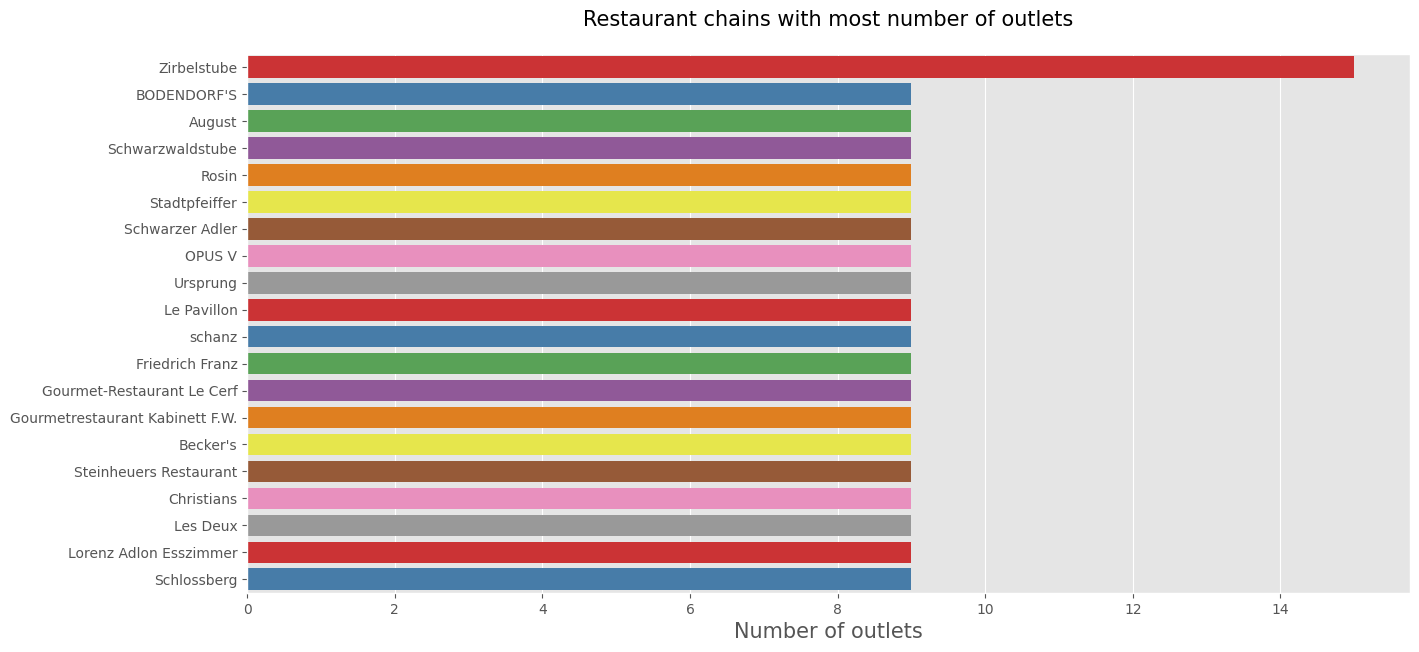

In [25]:
plt.figure(figsize=(15,7))
chains=df['Restaurant'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Restaurant chains with most number of outlets",size=15,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.show()

### **Number of Courses served in a Restaurant**

In [26]:
df.Courses.value_counts()[:20]

6 courses     645
7 courses     524
8 courses     350
5 courses     345
9 courses     195
10 courses    174
4 courses     148
11 courses     92
3 courses      42
12 courses     38
13 courses     28
14 courses     16
15 courses     16
25 courses      7
27 courses      7
18 courses      7
Name: Courses, dtype: int64

In [27]:
df['Courses']= df['Courses'].str.split(" ", n = 1, expand = True) 

df['Courses']

0       14
1        9
2        7
3        9
4        9
        ..
3450     5
3452     6
3455     4
3456     6
3460     6
Name: Courses, Length: 2634, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


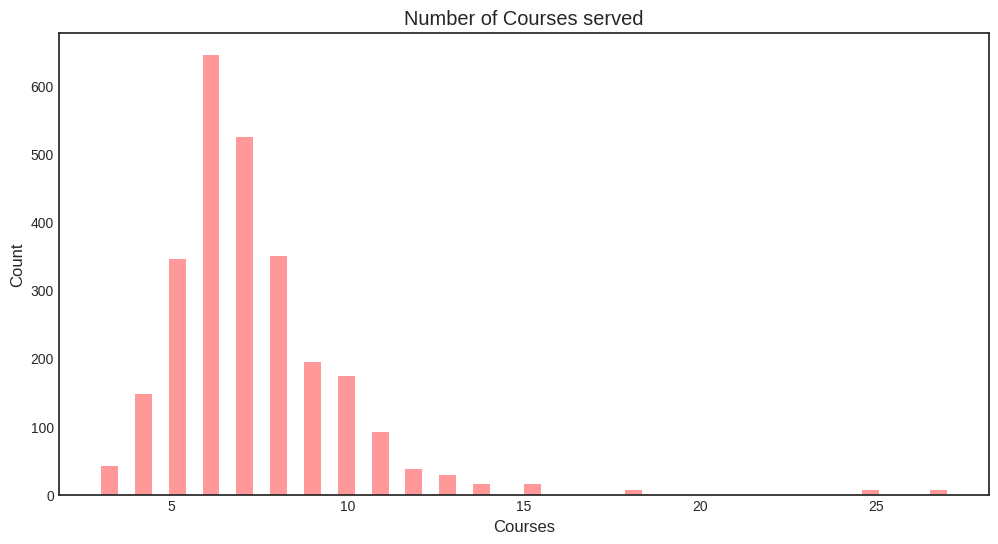

In [28]:
plt.figure(figsize=(12,6))
plt.style.use('seaborn-white')
sns.distplot(df['Courses'].astype(float),kde = False, color='r')
plt.ylabel('Count')
plt.title('Number of Courses served')
plt.show()